# Trading Card Classification
This goal of this project is to perform classification on images of cards from the two propular trading card games Magic the Gathering and the Pokemon Trading Card Game.

To get started make sure you have the following libraries installed:

In [1]:
!pip install requests beautifulsoup4 tensorflow opencv-python matplotlib numpy

# Data Collection
In this section we use webscraping to retrieve images of the cards we want to use from a website dedicated to their respective card type. 
## Libraries Used:
- requests: Used to make HTTP requests with python.
- BeautifulSoup: Used to parse HTML content and to locate the image file.
- os: Used when downloading the image.
- re: Python's regular expression library; used to remove invalid characters from the filename.
## Functions Defined:
- `sanitize_filename`: uses regex to remove invalid characters from the filename.
- `get_magic_card`: accesses the Scryfall website which is a database for Magic the Gathering cards. The '/random' path lets us go to a random card's page each time the function is run so we can get different images. We then locate the images url using its html tags which we found by using inspect element on the page. BeautifulSoup then gets the image url, it gets sanitized, and the image is downloaded to the '/data/Magic' directory within the project directory.
- `get_pokemon_card`: just like the previous function except instead of accessing a random 

In [39]:
import requests
from bs4 import BeautifulSoup
import os
import re

# Sanitize the filename by removing invalid characters
def sanitize_filename(filename):
    # Remove any characters that are not letters, numbers, or allowed special characters
    return re.sub(r'[\\/*?:"<>|]', '', filename)

def get_magic_card():
    url = 'https://scryfall.com/random'
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve webpage: {response.status_code}")
        exit()
    
    soup = BeautifulSoup(response.text, 'html.parser')
    img_tag = soup.find('img')
    if not img_tag or 'src' not in img_tag.attrs:
        print("No image found on the page.")
        exit()
    
    # Get the image URL
    img_url = img_tag['src']
    if not img_url.startswith(('http://', 'https://')):
        # Handle relative URLs
        img_url = requests.compat.urljoin(url, img_url)
    
    # Prepare the folder to save the image
    folder_name = os.path.join('data', 'Magic')
    os.makedirs(folder_name, exist_ok=True)  # Create the folder if it doesn't exist
    
    # Extract the image's original filename and sanitize it
    original_filename = os.path.basename(img_url)
    sanitized_filename = sanitize_filename(original_filename.split('?')[0])
    
    # Full path to save the image
    image_path = os.path.join(folder_name, sanitized_filename)

    # Check if the file already exists
    if os.path.exists(image_path):
        print(f"File {image_path} already exists. Fetching a new card...")
        get_magic_card()
        return
    
    # Download the image
    img_response = requests.get(img_url, stream=True)
    if img_response.status_code == 200:
        with open(image_path, 'wb') as img_file:
            for chunk in img_response.iter_content(1024):
                img_file.write(chunk)
        print(f"Image saved as {image_path}")
    else:
        print(f"Failed to download image: {img_response.status_code}")

In [15]:
sets = {
    "SSP": 252, "SCR": 175, "TWM": 226, "TEF": 218, "PAR": 266,
    "MEW": 207, "OBF": 230, "PAL": 279, "SVI": 258, "SIT": 185,
    "LOR": 217, "ASR": 216, "BRS": 186, "FST": 284, "EVS": 237,
    "CRE": 233, "BST": 183, "VIV": 203, "DAA": 201, "RCL": 209,
    "SSH": 216, "CEC": 271, "UNM": 258, "UNB": 234, "TEU": 196,
    "LOT": 236, "CES": 183, "FLI": 146, "UPR": 173, "CIN": 124,
    "BUS": 169, "GRI": 169, "SUM": 163, "EVO": 113, "STS": 116,
    "FCO": 125, "BKP": 123, "BKT": 164, "AOR": 100, "ROS": 110,
    "PRC": 164, "PHF": 122, "FFI": 113, "FLF": 109, "XY": 146,
    "LTR": 115, "PLB": 105, "PLF": 122, "PLS": 138, "BCR": 153,
    "DRX": 128, "DEX": 111, "NXD": 103, "NVI": 102, "EPO": 98,
    "BLW": 115, "CL": 95, "TM": 102, "UD": 90, "UL": 95,
    "HS": 123, "AR": 99, "SV": 150, "RR": 114, "PL": 130,
    "SF": 103, "LA": 146, "MD": 100, "GE": 106, "SW": 132,
    "MT": 124, "DP": 130, "PK": 108, "DF": 101, "CG": 100,
    "HP": 111, "LM": 93, "DS": 114, "UF": 115, "EM": 107,
    "DX": 108, "TRR": 111, "RG": 116, "HL": 102, "MA": 97,
    "DR": 100, "SS": 100, "RS": 109, "E3": 150, "E2": 150,
    "E1": 165, "N4": 113, "N3": 66, "N2": 75, "N1": 111,
    "G2": 132, "G1": 132, "TR": 83, "FO": 62, "JU": 64,
    "BS": 102
}
def get_pkmn_card(card_set, card_num):
    url = 'https://limitlesstcg.com/cards/' + card_set + '/' + str(card_num)
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve webpage: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'html.parser')
    img_tag = soup.find('img', class_='card shadow resp-w')
    if not img_tag or 'src' not in img_tag.attrs:
        print("No image found on the page.")
        return
    
    # Get the image URL
    img_url = img_tag['src']
    if not img_url.startswith(('http://', 'https://')):
        # Handle relative URLs
        img_url = requests.compat.urljoin(url, img_url)
    
    # Prepare the folder to save the image
    folder_name = os.path.join('data', 'Pokemon')
    os.makedirs(folder_name, exist_ok=True)  # Create the folder if it doesn't exist
    
    # Extract the image's original filename and sanitize it
    original_filename = os.path.basename(img_url)
    sanitized_filename = sanitize_filename(original_filename.split('?')[0])  # Remove query strings (e.g., '?1562709823')

    if "hires" in sanitized_filename:
        base, ext = os.path.splitext(sanitized_filename)
        sanitized_filename = f"{base}_{card_set}{ext}"
    
    # Full path to save the image
    image_path = os.path.join(folder_name, sanitized_filename)
    
    # Download the image
    img_response = requests.get(img_url, stream=True)
    if img_response.status_code == 200:
        with open(image_path, 'wb') as img_file:
            for chunk in img_response.iter_content(1024):
                img_file.write(chunk)
        print(f"Image saved as {image_path}")
    else:
        print(f"Failed to download image: {img_response.status_code}")
        return

In [4]:
# THIS CODE GATHERS ROUGHLY 30,000 IMAGES AND STORES THEM INTO THE DATA DIRECTORY. MY RECOMENDATION IS TO USE THE DATA PROVIDED
# BEFORE TRYING THIS BECAUSE IT WILL TAKE ROUGHLY 4 HOURS FOR THIS TO FINISH.
# Get Images
num_magic_cards_needed = 0
# Pokemon Images
for set, total_cards in sets.items():
    num_magic_cards_needed += total_cards
    for i in range(0,total_cards):
        get_pkmn_card(set, i+1)
    
for _ in range(num_magic_cards_needed):
    get_magic_card()

print("Finished Running")

Image saved as data\Pokemon\SSP_001_R_EN_LG.png
Image saved as data\Pokemon\SSP_002_R_EN_LG.png
Image saved as data\Pokemon\SSP_003_R_EN_LG.png
Image saved as data\Pokemon\SSP_004_R_EN_LG.png
Image saved as data\Pokemon\SSP_005_R_EN_LG.png
Image saved as data\Pokemon\SSP_006_R_EN_LG.png
Image saved as data\Pokemon\SSP_007_R_EN_LG.png
Image saved as data\Pokemon\SSP_008_R_EN_LG.png
Image saved as data\Pokemon\SSP_009_R_EN_LG.png
Image saved as data\Pokemon\SSP_010_R_EN_LG.png
Image saved as data\Pokemon\SSP_011_R_EN_LG.png
Image saved as data\Pokemon\SSP_012_R_EN_LG.png
Image saved as data\Pokemon\SSP_013_R_EN_LG.png
Image saved as data\Pokemon\SSP_014_R_EN_LG.png
Image saved as data\Pokemon\SSP_015_R_EN_LG.png
Image saved as data\Pokemon\SSP_016_R_EN_LG.png
Image saved as data\Pokemon\SSP_017_R_EN_LG.png
Image saved as data\Pokemon\SSP_018_R_EN_LG.png
Image saved as data\Pokemon\SSP_019_R_EN_LG.png
Image saved as data\Pokemon\SSP_020_R_EN_LG.png
Image saved as data\Pokemon\SSP_021_R_EN

## Visualization

In [6]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()

Found 28499 files belonging to 2 classes.


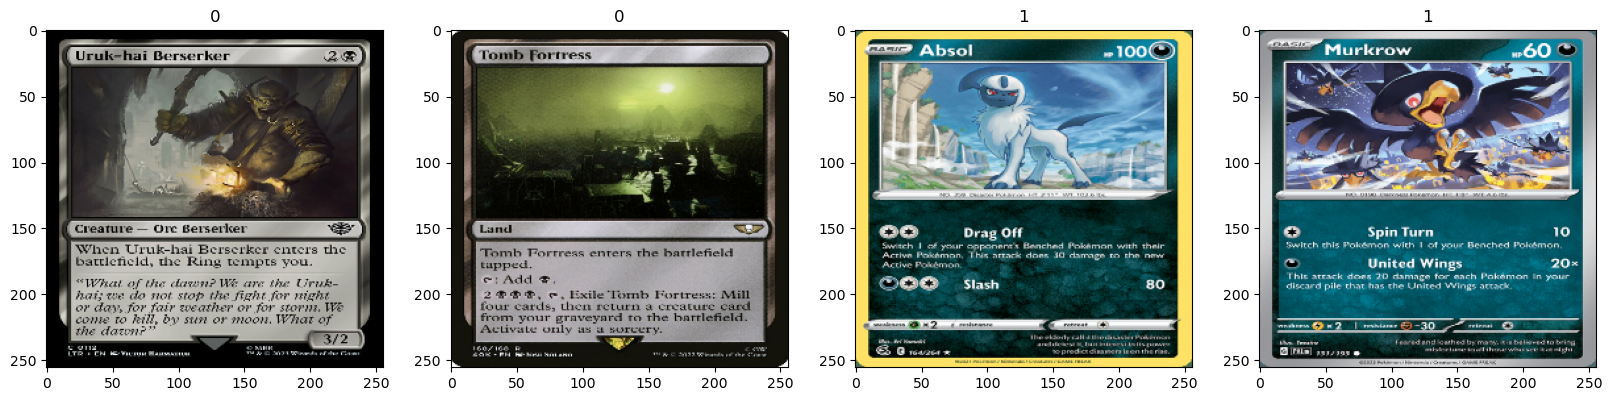

In [63]:
import numpy as np
from matplotlib import pyplot as plt
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing
In terms of preproccessing the images resized to 256x256 in the previous step and are normalized by dividing the pixel values by 255. Next the data is split into trainging, validation, and testing sets.

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model 1

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 237s 379ms/step - accuracy: 1.0000 - loss: 8.3508e-09 - val_accuracy: 1.0000 - val_loss: 3.3810e-07
Epoch 2/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 261s 418ms/step - accuracy: 1.0000 - loss: 6.0533e-09 - val_accuracy: 1.0000 - val_loss: 3.0439e-07
Epoch 3/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 273s 439ms/step - accuracy: 1.0000 - loss: 4.3685e-09 - val_accuracy: 1.0000 - val_loss: 2.8372e-07
Epoch 4/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 266s 427ms/step - accuracy: 1.0000 - loss: 3.1889e-09 - val_accuracy: 1.0000 - val_loss: 2.5571e-07
Epoch 5/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 257s 413ms/step - accuracy: 1.0000 - loss: 2.3725e-09 - val_accuracy: 1.0000 - val_loss: 2.0546e-07
Epoch 6/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 269s 432ms/step - accuracy: 1.0000 - loss: 1.6967e-09 - val_accuracy: 1.0000 - val_loss: 2.2041e-07
Epoch 7/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 273s 438ms/step - accuracy: 1.0000 - loss: 1.2519e-09 - val_accuracy: 1.0000 - val_loss: 2.0369e-07
Epoch 8/20
623/623 ━

## Model Performance

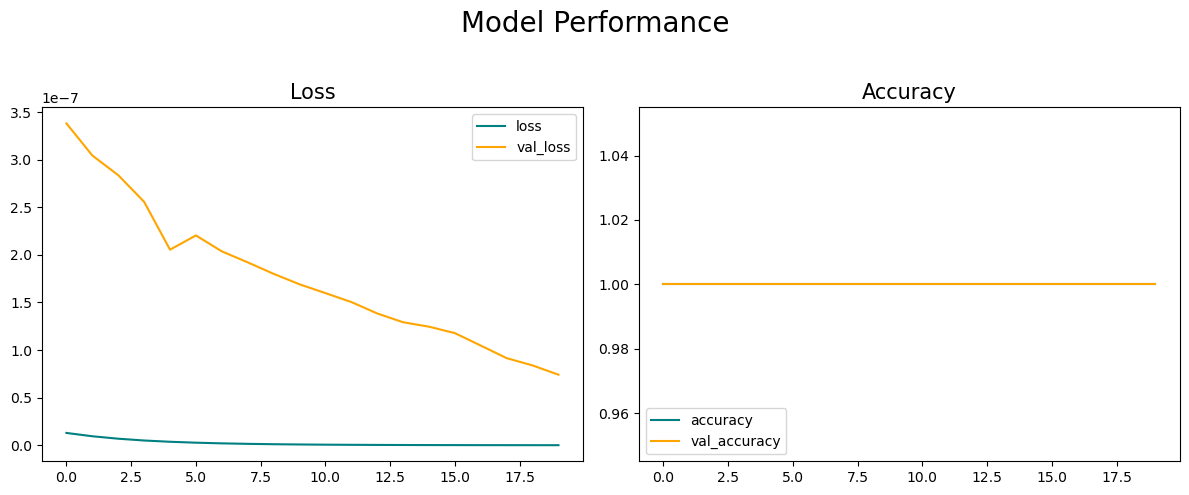

In [68]:
# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot loss in the first subplot
axes[0].plot(hist.history['loss'], color='teal', label='loss')
axes[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=15)
axes[0].legend(loc="upper right")

# Plot accuracy in the second subplot
axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=15)
axes[1].legend(loc="lower left")

# Set a super title for the entire figure
fig.suptitle('Model Performance', fontsize=20)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the super title
plt.show()

## Evaluation Metrics

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print(f' Precision:\t{precision.result().numpy()}\n Recall:\t{recall.result().numpy()}\n Accuracy:\t{accuracy.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 

## Testing the Model

In [70]:
import cv2

predictions = []
real_values = []
testing_dir = "testing"
class_dirs = ["Pokemon", "Magic"]
for idx, class_name in enumerate(class_dirs):
    class_path = os.path.join(testing_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        resized_img = tf.image.resize(img, (256, 256))

        # Predict the class
        prediction = model.predict(np.expand_dims(resize/255, 0))
        
        # Store prediction and actual label
        predictions.append(prediction)
        real_values.append(idx)

accuracy = np.mean(np.array(predictions) == np.array(real_values))
print(f"Model Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

# Model 2

In [58]:
model2 = Sequential()
model2.add(Input(shape=(256,256,3)))
model2.add(Conv2D(16, (2,2), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (2,2), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, (2,2), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (2,2), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (2,2), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 255, 255, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 126, 126, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 62, 62, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 30, 30, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 14, 14, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,049 (867.38 KB)

 Trainable params: 222,049 (867.38 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 278s 443ms/step - accuracy: 0.9197 - loss: 0.1592 - val_accuracy: 0.9984 - val_loss: 0.0067
Epoch 2/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 425s 682ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9937 - val_loss: 0.0245
Epoch 3/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 421s 676ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9961 - val_loss: 0.0155
Epoch 4/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 441s 707ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9984 - val_loss: 0.0055
Epoch 5/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 424s 679ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9972 - val_loss: 0.0083
Epoch 6/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 428s 687ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9996 - val_loss: 0.0038
Epoch 7/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 422s 677ms/step - accuracy: 1.0000 - loss: 6.1462e-05 - val_accuracy: 0.9995 - val_loss: 0.0042
Epoch 8/20
623/623 ━━━━━━━━━━━━━━━━━━━━ 423s 678ms/step - accuracy: 1.00

## Model Performance

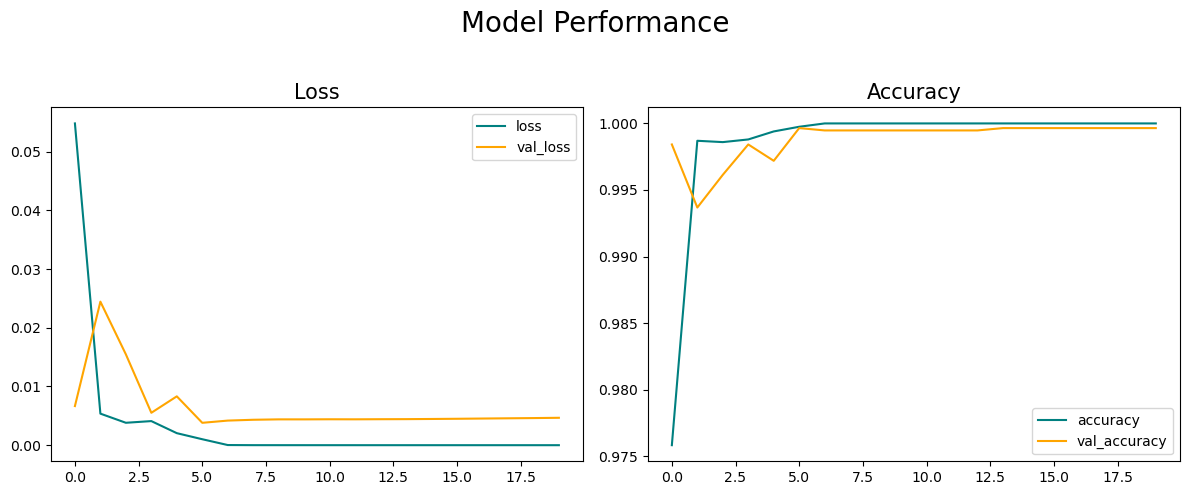

In [65]:
# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot loss in the first subplot
axes[0].plot(hist.history['loss'], color='teal', label='loss')
axes[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=15)
axes[0].legend(loc="upper right")

# Plot accuracy in the second subplot
axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=15)
axes[1].legend(loc="lower right")

# Set a super title for the entire figure
fig.suptitle('Model Performance', fontsize=20)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the super title
plt.show()

## Evaluation Metrics

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model2.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print(f' Precision:\t{precision.result().numpy()}\n Recall:\t{recall.result().numpy()}\n Accuracy:\t{accuracy.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Testing the Model

In [62]:
import cv2

predictions = []
real_values = []
testing_dir = "testing"
class_dirs = ["Pokemon", "Magic"]
for idx, class_name in enumerate(class_dirs):
    class_path = os.path.join(testing_dir, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        resized_img = tf.image.resize(img, (256, 256))

        # Predict the class
        prediction = model2.predict(np.expand_dims(resize/255, 0))
        
        # Store prediction and actual label
        predictions.append(prediction)
        real_values.append(idx)

accuracy = np.mean(np.array(predictions) == np.array(real_values))
print(f"Model Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━